## Introduction to linear regression.

In this jupyter notebook we will start with a very simple problem of predicting the height of the user using the weight, age and sex. 

   *  Simple linear model
   *  Linear model with non linear interactions
   *  Random Forest
   *  GridSearch to find the best paramets

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')

Import the data and learn about existing fields and analyze the dataframe

In [2]:
data = pd.read_csv('dataset/Howell1.csv', sep=';')

In [3]:
data.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0



## Visualize the data

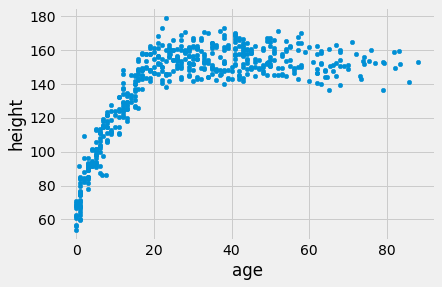

In [4]:
data.plot(x='age', y='height', kind='scatter')

## Fit Regression Line

/Users/shrikararchak/Anaconda/anaconda/envs/ds/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


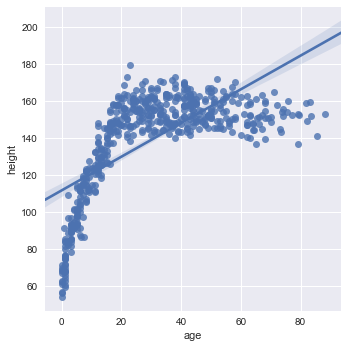

In [5]:
import seaborn as sns
sns.lmplot(x='age',y='height',data=data,fit_reg=True) 

As you can see from the data that height of a person increase from age 0 to 20 but tend to stabilize after 20 years. During this phase we can see that its easier to fit a linear model but after that the data doesn't signify any linear interaction between age and height

A linear model would not perform well on all the dataset. But if we consider only the data in the range age 0 to 20 we can linear model does a better job of fitting the model

## Fit a linear model for age < 20

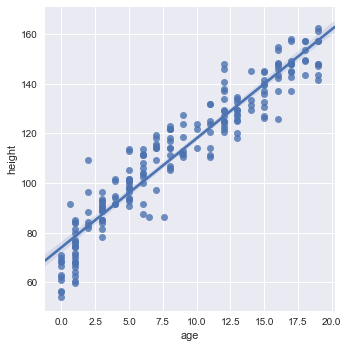

In [6]:
sns.lmplot(x='age',y='height',data=data[data.age < 20],fit_reg=True) 

## Simple Linear model

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict

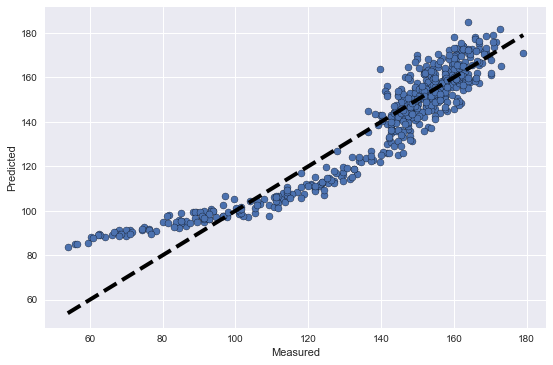

MEAN Squared Error : 89.62222301721019. (Lower the better)


In [8]:
lr = LinearRegression()
train = data.loc[:, data.columns != 'height']
target = data.height
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, train, target, cv=10)

fig, ax = plt.subplots()
ax.scatter(target, predicted, edgecolors=(0, 0, 0))
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
error = mean_squared_error(target, predicted)
print("MEAN Squared Error : {}. (Lower the better)".format(error))

As we can see above the Error is significantly high. Predictions are off quite a bit.

Lets try to help the linear model by adding more features.

   * As we see from the data we can probably add a new feature like age < 20

In [9]:
data['age_less_than_20'] = (data.age<20).astype(int)

In [10]:
data.head()

,height,weight,age,male,age_less_than_20
0,151.765,47.825606,63.0,1,0
1,139.700,36.485807,63.0,0,0
2,136.525,31.864838,65.0,0,0
3,156.845,53.041915,41.0,1,0
4,145.415,41.276872,51.0,0,0


Now lets try to fit the model again with this new feature

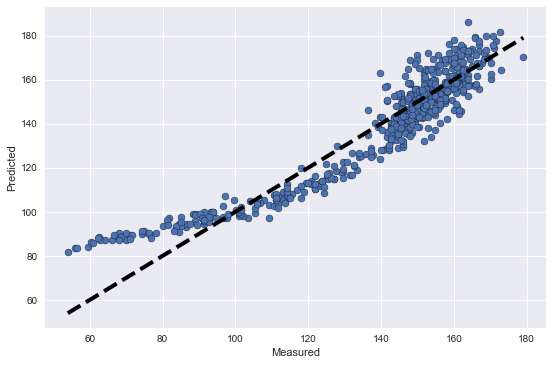

MEAN Squared Error : 85.68689844692364. (Lower the better)


In [11]:
lr = LinearRegression()
train = data.loc[:, data.columns != 'height']
target = data.height
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, train, target, cv=10)

fig, ax = plt.subplots()
ax.scatter(target, predicted, edgecolors=(0, 0, 0))
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
error = mean_squared_error(target, predicted)
print("MEAN Squared Error : {}. (Lower the better)".format(error))

We can see that the error decreased, but not a lot. Let go ahead and add a feature which is square of the age and square of the weight

In [12]:
data['squared_age'] = data['age'] ** 2

In [13]:
data['squared_weight'] = data['weight'] ** 2

In [14]:
data.head()

,height,weight,age,male,age_less_than_20,squared_age,squared_weight
0,151.765,47.825606,63.0,1,0,3969.0,2287.288637
1,139.700,36.485807,63.0,0,0,3969.0,1331.214076
2,136.525,31.864838,65.0,0,0,4225.0,1015.367901
3,156.845,53.041915,41.0,1,0,1681.0,2813.444694
4,145.415,41.276872,51.0,0,0,2601.0,1703.780162


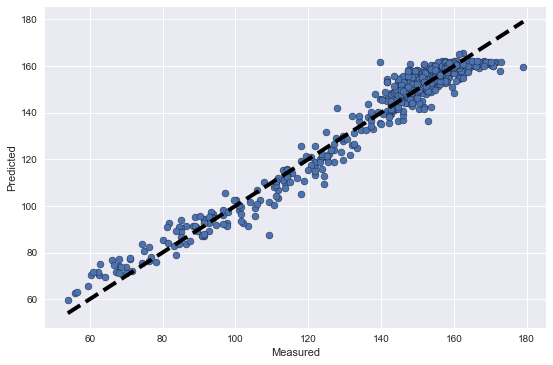

MEAN Squared Error : 28.509278178481857. (Lower the better)


In [15]:
lr = LinearRegression()
train = data.loc[:, data.columns != 'height']
target = data.height
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, train, target, cv=10)

fig, ax = plt.subplots()
ax.scatter(target, predicted, edgecolors=(0, 0, 0))
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
error = mean_squared_error(target, predicted)
print("MEAN Squared Error : {}. (Lower the better)".format(error))

Great! We were able to reduce the error from 89 to 28.5 by adding higher order features. One thing to note is that the model complexity increase as we add more higher order features

## Random forest

We can use a random forest classifier which can fit the data without even needing any higher order features

In [16]:
data = pd.read_csv('dataset/Howell1.csv', sep=';')

In [17]:
data.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


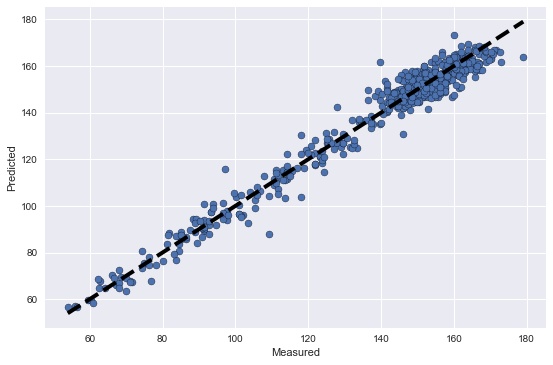

MEAN Squared Error : 24.180449739870596. (Lower the better)


In [18]:
from sklearn.ensemble import RandomForestRegressor
lr = RandomForestRegressor()
train = data.loc[:, data.columns != 'height']
target = data.height
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, train, target, cv=10)

fig, ax = plt.subplots()
ax.scatter(target, predicted, edgecolors=(0, 0, 0))
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
error = mean_squared_error(target, predicted)
print("MEAN Squared Error : {}. (Lower the better)".format(error))

The lowest mean squared error without using any higher order features

In [19]:
params = {
    'n_estimators': [3, 5, 10, 20, 50], 
    'max_depth': [3, 5, 7, 9],
    'min_samples_leaf' : [1, 2, 3, 4, 5]
}


Use grid_search_cv to find the best parameters

In [20]:
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import StratifiedKFold, KFold

/Users/shrikararchak/Anaconda/anaconda/envs/ds/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/shrikararchak/Anaconda/anaconda/envs/ds/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [21]:
grid = GridSearchCV(estimator=RandomForestRegressor(), param_grid=params, cv=5, verbose=1)

In [22]:
grid.fit(train, target)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   10.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [3, 5, 10, 20, 50], 'min_samples_leaf': [1, 2, 3, 4, 5], 'max_depth': [3, 5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [23]:
grid.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [24]:
grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 50}

In [25]:
grid.best_score_

0.9633401674741805

Use the best params from the grid search above

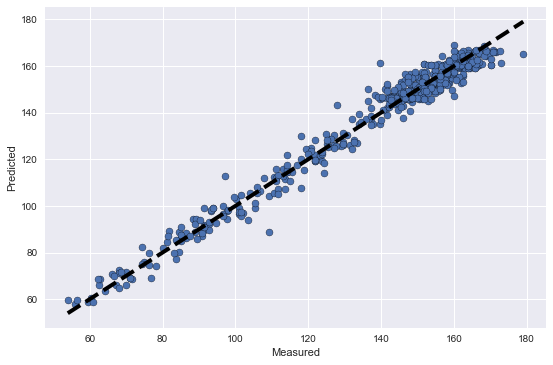

MEAN Squared Error : 19.702636480588406. (Lower the better)


In [26]:
lr = RandomForestRegressor(n_estimators=20, min_samples_leaf=2, max_depth=5)
train = data.loc[:, data.columns != 'height']
target = data.height
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, train, target, cv=10)

fig, ax = plt.subplots()
ax.scatter(target, predicted, edgecolors=(0, 0, 0))
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
error = mean_squared_error(target, predicted)
print("MEAN Squared Error : {}. (Lower the better)".format(error))

With random forest we are able to get the lowest mean squared error and able to predict the height within +- 20 cms of the true value